# 1. Import Library

In [ ]:
# Simple CNN model for the CIFAR-10 Dataset
import numpy
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

# 數據準備

In [ ]:
(X_img_train, y_label_train), (X_img_test, y_label_test) = cifar10.load_data()

In [ ]:
print("train data:",'images:',X_img_train.shape," labels:",y_label_train.shape)
print("test  data:",'images:',X_img_test.shape ," labels:",y_label_test.shape)

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [ ]:
X_img_train_normalize = X_img_train.astype('float32') / 255.0
X_img_test_normalize = X_img_test.astype('float32') / 255.0

In [ ]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [ ]:
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [ ]:
model = Sequential()

In [ ]:
#卷積層1與池化層1

In [ ]:
model.add(Conv2D(filters=32,kernel_size=(3, 3),input_shape=(32, 32,3),
                 activation='relu', padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size=(3, 3),
                 activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
#卷積層2與池化層2

In [ ]:
model.add(Conv2D(filters=64, kernel_size=(3, 3),
                 activation='relu', padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=64, kernel_size=(3, 3),
                 activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
#卷積層3與池化層3

In [ ]:
model.add(Conv2D(filters=128, kernel_size=(3, 3),
                 activation='relu', padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=128, kernel_size=(3, 3),
                 activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
#建立神經網絡(平坦層、隱藏層、輸出層)

In [ ]:
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(2500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout_6 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_7 (Dropout)         (None, 16, 16, 64)        0         
                                                      

# 加載之前訓練的模型

In [ ]:
try:
    model.load_weights("SaveModel/cifarCnnModelnew.h1")
    print("加載模型成功!繼續訓練模型")
except :
    print("加載模型失敗!開始訓練一個新模型")

加載模型失敗!開始訓練一個新模型


# 训练模型

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [ ]:
train_history=model.fit(X_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=1, batch_size=256, verbose=1)

313/313 [==============================] - 415s 1s/step - loss: 1.8144 - accuracy: 0.3243 - val_loss: 1.5963 - val_accuracy: 0.4198


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

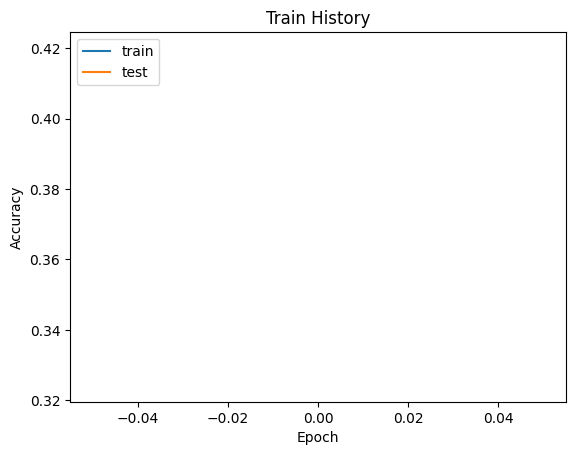

In [ ]:
show_train_history('accuracy','val_accuracy')

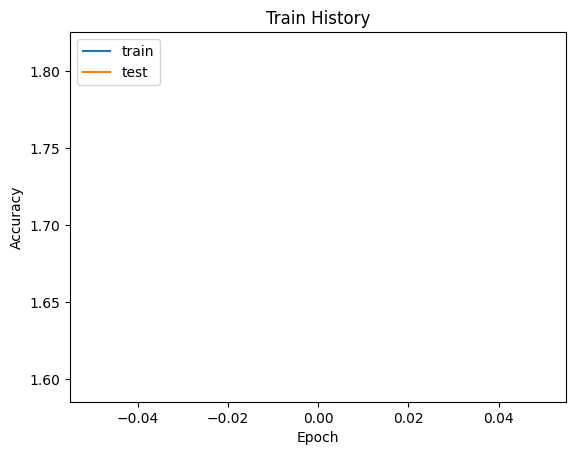

In [ ]:
show_train_history('loss','val_loss')

# 评估模型的准确率

In [ ]:
scores = model.evaluate(X_img_test_normalize,
                        y_label_test_OneHot,verbose=0)
scores[1]

0.42419999837875366

# 进行预测

In [ ]:
prediction=np.argmax(model.predict(X_img_test_normalize),axis=1)

313/313 [==============================] - 26s 84ms/step


In [ ]:
prediction[:10]

array([3, 8, 8, 8, 4, 6, 1, 6, 5, 1])

In [ ]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [ ]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')

        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]

        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

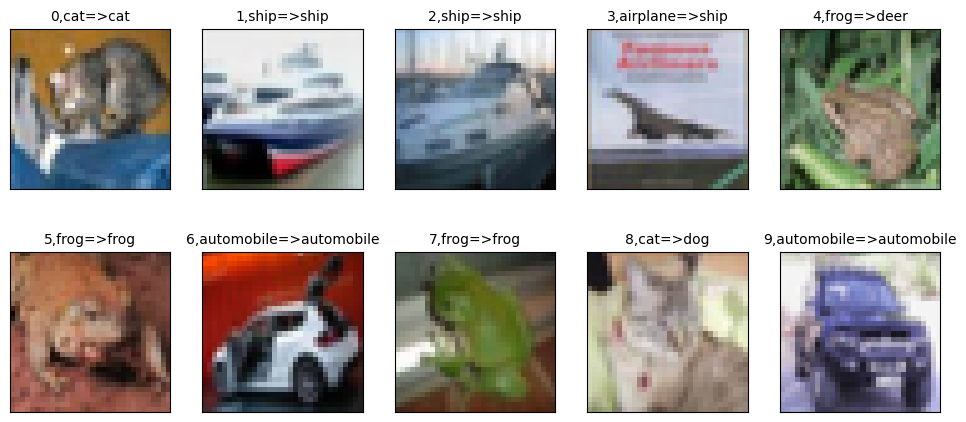

In [ ]:
plot_images_labels_prediction(X_img_test_normalize,y_label_test,
                              prediction,0,10)

# 查看预测概率

In [ ]:
Predicted_Probability=model.predict(X_img_test_normalize)

313/313 [==============================] - 26s 84ms/step


In [ ]:
def show_Predicted_Probability(X_img,Predicted_Probability,i):
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(X_img_test[i],(32, 32,3)))
    plt.show()
    for j in range(10):
        print(label_dict[j]+' Probability:%1.9f'%(Predicted_Probability[i][j]))

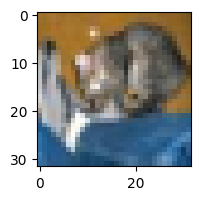

airplane Probability:0.012397978
automobile Probability:0.006643432
bird Probability:0.058784213
cat Probability:0.425236851
deer Probability:0.047274545
dog Probability:0.212032318
frog Probability:0.182628810
horse Probability:0.028015340
ship Probability:0.018555010
truck Probability:0.008431533


In [ ]:
show_Predicted_Probability(X_img_test,Predicted_Probability,0)

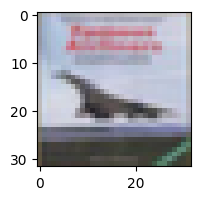

airplane Probability:0.177999169
automobile Probability:0.037169755
bird Probability:0.027416427
cat Probability:0.016649036
deer Probability:0.014848973
dog Probability:0.005721856
frog Probability:0.008076921
horse Probability:0.004653902
ship Probability:0.677868247
truck Probability:0.029595794


In [ ]:
show_Predicted_Probability(X_img_test,Predicted_Probability,3)

# Save Weight to h5

In [ ]:
model.save_weights("SaveModel/cifarCnnModelnew.h1")
print("Saved model to disk")

Saved model to disk
